In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

## PreTratamento nos dados

Merge e shuffle de todos os bancos de dados

In [10]:
# Simulation Parameters
DATASET_PATH='../Dataset/'
TRUE_NEWS_DATASET = DATASET_PATH + 'True.csv'
FAKE_NEWS_DATASET= DATASET_PATH + 'Fake.csv'
WEL_FAKE_DATASET=DATASET_PATH +'WELFake_Dataset.csv'

In [11]:
#load Data

fake_news_df = pd.read_csv(TRUE_NEWS_DATASET)
true_news_df = pd.read_csv(FAKE_NEWS_DATASET)

### Pré Avaliação Datasets

In [12]:
fake_news_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


Text(0.5, 1.0, 'Fake news distribution per Subject')

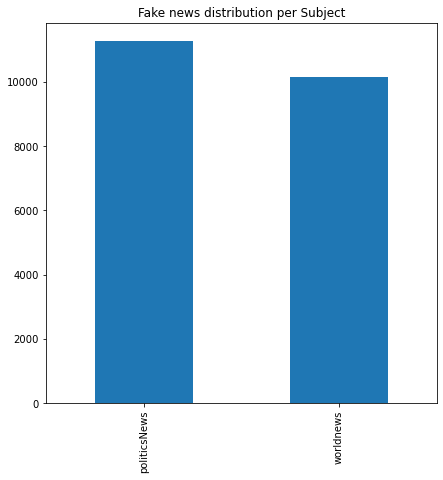

In [13]:
fig = plt.figure(figsize=(7,7))
fake_news_df['subject'].value_counts().plot(kind='bar')
plt.title('Fake news distribution per Subject')

#### True news

In [14]:
true_news_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


Text(0.5, 1.0, 'True news distribution per Subject')

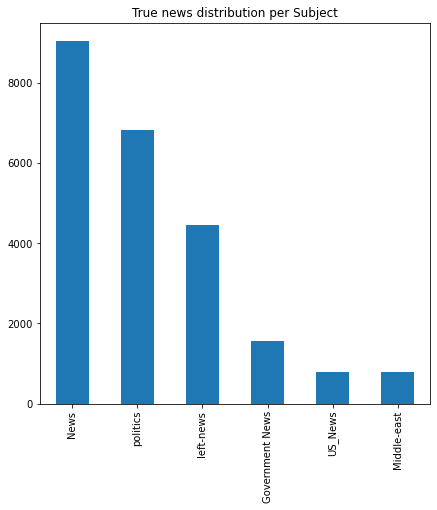

In [15]:
fig = plt.figure(figsize=(7,7))
true_news_df['subject'].value_counts().plot(kind='bar')
plt.title('True news distribution per Subject')

Comparando a distribuição de assunto entre as fakenews com as True news percebe-se que as fakenews são focadas em dois principais assutos equanto as notícias verdadeira são mais diversas. Será então que se queremos construir um bom detector de fake news não deveriamos então focar nesses dois assuntos? Ou então o assunto não seria relevante?

#### WelNews

Vamos considerar só relevante o titulo e o texto relativo as noticias

In [16]:
## merge
true_news_df['label'] = 0
true_news_df_rev= true_news_df[['title','text','label']].copy()

fake_news_df['label'] = 1
fake_news_df_rev= fake_news_df[['title','text','label']].copy()


news_df = pd.concat([true_news_df_rev, fake_news_df_rev], axis=0)



In [17]:
#shuffle dataset
news_df = news_df.sample(frac=1).reset_index(drop=True)

In [18]:
news_df

,title,text,label
0,Obama budget envisions $2.9 trillion in 10-yea...,WASHINGTON (Reuters) - President Barack Obama ...,1
1,"Biden, not mentioning Trump, defends free pres...",(Reuters) - Former Vice President Joe Biden de...,1
2,"Bernie Gives Us Hope, Promises To Protect Min...","The unthinkable has happened, and we are now a...",0
3,HEY CNN…REMEMBER OBAMA’S Notorious “Friday Nig...,Republican Rep. Steve King: The base is going ...,0
4,Four foreigners working at power plant kidnapp...,"BENGHAZI, Libya (Reuters) - Four foreign engin...",1
...,...,...,...
44893,"After Trump pulls out, Fox News cancels Republ...",WASHINGTON (Reuters) - The U.S. Republican pre...,1
44894,Democrats urge FCC to drop plan to revise TV o...,WASHINGTON (Reuters) - The top Democrat in the...,1
44895,Trump could find Democratic allies on tax refo...,WASHINGTON (Reuters) - In the looming tax refo...,1
44896,WOW! Do Anti-Trump Protesters REALLY Know What...,Wow! Talk about clueless! Austen Fletcher appr...,0


In [19]:

#shuffle dataset
news_df = news_df.sample(frac=1).reset_index(drop=True)

In [20]:
#save dataset
news_df.to_csv(DATASET_PATH + 'news_dataset.csv')

## Data Preprocessing

In [21]:
def remove_especial_chars(text):

  return re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

### Removendo caracteres Especiais

In [22]:
#removing especial charactercts

news_df_preprocessed = news_df.copy()
news_df_preprocessed['title'] = news_df_preprocessed['title'].apply(remove_especial_chars)
news_df_preprocessed['text'] = news_df_preprocessed['text'].apply(remove_especial_chars)

#conver every character to lower case to not confusing model

news_df_preprocessed['title'] = news_df_preprocessed['title'].apply(lambda text: text.lower())
news_df_preprocessed['text'] = news_df_preprocessed['text'].apply(lambda text: text.lower())


In [23]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
#tokenizing
news_df_preprocessed['title_tokens'] = news_df_preprocessed['title'].apply(nltk.word_tokenize)
news_df_preprocessed['text_tokens'] = news_df_preprocessed['text'].apply(nltk.word_tokenize)

In [25]:
news_df_preprocessed

,title,text,label,title_tokens,text_tokens
0,boom florida paper makes unprecedented apolog...,is this apology too little too late after one...,0,"[boom, florida, paper, makes, unprecedented, a...","[is, this, apology, too, little, too, late, af..."
1,leftist store owner makes video asking libs to...,things didn t go as well as nicholle had hoped...,0,"[leftist, store, owner, makes, video, asking, ...","[things, didn, t, go, as, well, as, nicholle, ..."
2,dhs secretary gets hammered with where s obam...,we know where obama s been and what he s doing...,0,"[dhs, secretary, gets, hammered, with, where, ...","[we, know, where, obama, s, been, and, what, h..."
3,trump s love for israel still not quite requ...,jerusalem reuters i love the people in th...,1,"[trump, s, love, for, israel, still, not, quit...","[jerusalem, reuters, i, love, the, people, in,..."
4,hillary clinton makes surprise appearance at n...,new york reuters hillary clinton who unti...,1,"[hillary, clinton, makes, surprise, appearance...","[new, york, reuters, hillary, clinton, who, un..."
...,...,...,...,...,...
44893,shi ites gather in iraq s kerbala for mourning...,kerbala iraq reuters chanting and flailin...,1,"[shi, ites, gather, in, iraq, s, kerbala, for,...","[kerbala, iraq, reuters, chanting, and, flaili..."
44894,lawyer for illegal alien rapists hysteria o...,,0,"[lawyer, for, illegal, alien, rapists, hysteri...",[]
44895,ca middle school won t release student council...,your daily dose of insanity a san francisco mi...,0,"[ca, middle, school, won, t, release, student,...","[your, daily, dose, of, insanity, a, san, fran..."
44896,trump says suspected gunman who shot at lawmak...,washington reuters u s president donald t...,1,"[trump, says, suspected, gunman, who, shot, at...","[washington, reuters, u, s, president, donald,..."


In [26]:
#stopping work elimination

from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')

def eliminate_stopwords(tokens):
  return [word for word in tokens if word not in stop_words]


#eliminate stop words
news_df_preprocessed['title_tokens'] = news_df_preprocessed['title_tokens'].apply(eliminate_stopwords)
news_df_preprocessed['text_tokens'] = news_df_preprocessed['title_tokens'].apply(eliminate_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
news_df_preprocessed

,title,text,label,title_tokens,text_tokens
0,boom florida paper makes unprecedented apolog...,is this apology too little too late after one...,0,"[boom, florida, paper, makes, unprecedented, a...","[boom, florida, paper, makes, unprecedented, a..."
1,leftist store owner makes video asking libs to...,things didn t go as well as nicholle had hoped...,0,"[leftist, store, owner, makes, video, asking, ...","[leftist, store, owner, makes, video, asking, ..."
2,dhs secretary gets hammered with where s obam...,we know where obama s been and what he s doing...,0,"[dhs, secretary, gets, hammered, obama, questi...","[dhs, secretary, gets, hammered, obama, questi..."
3,trump s love for israel still not quite requ...,jerusalem reuters i love the people in th...,1,"[trump, love, israel, still, quite, requited]","[trump, love, israel, still, quite, requited]"
4,hillary clinton makes surprise appearance at n...,new york reuters hillary clinton who unti...,1,"[hillary, clinton, makes, surprise, appearance...","[hillary, clinton, makes, surprise, appearance..."
...,...,...,...,...,...
44893,shi ites gather in iraq s kerbala for mourning...,kerbala iraq reuters chanting and flailin...,1,"[shi, ites, gather, iraq, kerbala, mourning, r...","[shi, ites, gather, iraq, kerbala, mourning, r..."
44894,lawyer for illegal alien rapists hysteria o...,,0,"[lawyer, illegal, alien, rapists, hysteria, ra...","[lawyer, illegal, alien, rapists, hysteria, ra..."
44895,ca middle school won t release student council...,your daily dose of insanity a san francisco mi...,0,"[ca, middle, school, release, student, council...","[ca, middle, school, release, student, council..."
44896,trump says suspected gunman who shot at lawmak...,washington reuters u s president donald t...,1,"[trump, says, suspected, gunman, shot, lawmake...","[trump, says, suspected, gunman, shot, lawmake..."


In [28]:
nltk.download('rslp')
def steam_text(tokens):
  stemmer = nltk.stem.RSLPStemmer()
  return  [stemmer.stem(word) for word in tokens]

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [29]:
#stemming tokens
news_df_preprocessed['title_tokens'] = news_df_preprocessed['title_tokens'].apply(steam_text)
news_df_preprocessed['text_tokens'] = news_df_preprocessed['title_tokens'].apply(steam_text)

In [30]:
news_df_preprocessed

,title,text,label,title_tokens,text_tokens
0,boom florida paper makes unprecedented apolog...,is this apology too little too late after one...,0,"[boom, flor, pap, mak, unprecedented, apology,...","[boom, fl, pap, mak, unprecedented, apology, u..."
1,leftist store owner makes video asking libs to...,things didn t go as well as nicholle had hoped...,0,"[leftist, stor, own, mak, vide, asking, lib, h...","[leftist, st, own, mak, vid, asking, lib, help..."
2,dhs secretary gets hammered with where s obam...,we know where obama s been and what he s doing...,0,"[dh, secretary, get, hammered, obam, questiom,...","[dh, secretary, get, hammered, ob, questiom, b..."
3,trump s love for israel still not quite requ...,jerusalem reuters i love the people in th...,1,"[trump, lov, israel, still, quit, requited]","[trump, lov, israel, still, quit, requited]"
4,hillary clinton makes surprise appearance at n...,new york reuters hillary clinton who unti...,1,"[hillary, clinton, mak, surpris, appearanc, ne...","[hillary, clinton, mak, surpril, appearanc, ne..."
...,...,...,...,...,...
44893,shi ites gather in iraq s kerbala for mourning...,kerbala iraq reuters chanting and flailin...,1,"[shi, ite, gath, iraq, kerbal, mourning, rit]","[shi, ite, gath, iraq, kerb, mourning, rit]"
44894,lawyer for illegal alien rapists hysteria o...,,0,"[lawy, illeg, alien, rapist, hyst, rap, 14, ye...","[lawy, illeg, alien, rapist, hyst, rap, 14, ye..."
44895,ca middle school won t release student council...,your daily dose of insanity a san francisco mi...,0,"[ca, middl, school, releas, student, council, ...","[ca, middl, school, rele, student, council, el..."
44896,trump says suspected gunman who shot at lawmak...,washington reuters u s president donald t...,1,"[trump, say, suspected, gunman, shot, lawmak, ...","[trump, say, suspected, gunman, shot, lawmak, ..."


In [34]:
from gensim.models import Word2Vec
import multiprocessing

cores = multiprocessing.cpu_count()

In [43]:
# Train Word2Vec model for text column
text_corpus  = news_df_preprocessed['text_tokens'].tolist()
model_for_text =  Word2Vec(sentences=text_corpus, window=5, min_count=1, workers=4)

In [44]:
# Train Word2Vec model for title column
title_corpus = news_df_preprocessed['title_tokens'].tolist()
model_for_title = Word2Vec(sentences=title_corpus, window=5, min_count=1, workers=4)

In [45]:
def get_vectors_from_text(tokens):

  return [model_for_text.wv[word] for word in tokens]



def get_vectors_from_title(tokens):

  return [model_for_title.wv[word] for word in tokens]




In [46]:
# Word2Vector
news_df_preprocessed['text_vectors'] = news_df_preprocessed['text_tokens'].apply(get_vectors_from_text)
news_df_preprocessed['title_vectors']  = news_df_preprocessed['title_tokens'].apply(get_vectors_from_title)


In [47]:
news_df_preprocessed

,title,text,label,title_tokens,text_tokens,text_vectors,title_vectors
0,boom florida paper makes unprecedented apolog...,is this apology too little too late after one...,0,"[boom, flor, pap, mak, unprecedented, apology,...","[boom, fl, pap, mak, unprecedented, apology, u...","[[0.18148205, 0.6286861, -0.08234527, 0.385867...","[[0.12163732, 0.5492595, -0.12063697, 0.253826..."
1,leftist store owner makes video asking libs to...,things didn t go as well as nicholle had hoped...,0,"[leftist, stor, own, mak, vide, asking, lib, h...","[leftist, st, own, mak, vid, asking, lib, help...","[[0.3930135, 0.8134345, -0.26216397, 0.3839057...","[[0.18327442, 0.36084375, -0.42050612, 0.13231..."
2,dhs secretary gets hammered with where s obam...,we know where obama s been and what he s doing...,0,"[dh, secretary, get, hammered, obam, questiom,...","[dh, secretary, get, hammered, ob, questiom, b...","[[-0.18724757, 0.37045085, 0.19570261, -0.0656...","[[-0.1459549, 0.36565784, 0.012688648, -0.1704..."
3,trump s love for israel still not quite requ...,jerusalem reuters i love the people in th...,1,"[trump, lov, israel, still, quit, requited]","[trump, lov, israel, still, quit, requited]","[[-0.6035606, 0.058519926, 1.0488026, 0.661859...","[[-0.27008486, 0.89033854, 0.45551628, 0.99260..."
4,hillary clinton makes surprise appearance at n...,new york reuters hillary clinton who unti...,1,"[hillary, clinton, mak, surpris, appearanc, ne...","[hillary, clinton, mak, surpril, appearanc, ne...","[[0.66895515, 1.3790439, 0.24679556, 0.6256625...","[[1.2544948, 0.6551059, -0.021267429, 1.036824..."
...,...,...,...,...,...,...,...
44893,shi ites gather in iraq s kerbala for mourning...,kerbala iraq reuters chanting and flailin...,1,"[shi, ite, gath, iraq, kerbal, mourning, rit]","[shi, ite, gath, iraq, kerb, mourning, rit]","[[-0.22232762, 0.22952448, 0.13670993, -0.1587...","[[-0.19800244, 0.23862194, -0.022670552, -0.20..."
44894,lawyer for illegal alien rapists hysteria o...,,0,"[lawy, illeg, alien, rapist, hyst, rap, 14, ye...","[lawy, illeg, alien, rapist, hyst, rap, 14, ye...","[[-0.4278246, 0.45558253, 0.27990055, -0.04040...","[[-0.03924484, 0.63799477, 0.32200858, -0.4973..."
44895,ca middle school won t release student council...,your daily dose of insanity a san francisco mi...,0,"[ca, middl, school, releas, student, council, ...","[ca, middl, school, rele, student, council, el...","[[-0.6256346, 0.4160274, 0.29376268, 0.1298865...","[[0.020335566, 0.22911632, -0.19879112, -0.019..."
44896,trump says suspected gunman who shot at lawmak...,washington reuters u s president donald t...,1,"[trump, say, suspected, gunman, shot, lawmak, ...","[trump, say, suspected, gunman, shot, lawmak, ...","[[-0.6035606, 0.058519926, 1.0488026, 0.661859...","[[-0.27008486, 0.89033854, 0.45551628, 0.99260..."
